# Data Exploratory and Preprocessing

## Importing relevant libs

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

## Loading our data and reading the head 

In [2]:
df = pd.read_csv('McDonalds-Yelp-Sentiment-DFE.csv', encoding = "ISO-8859-1")
df.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave..."
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo..."
5,679455658,False,finalized,3,2/21/15 0:13,BadFood\rSlowService,0.7111\r0.6444,Atlanta,NaN,This has to be one of the worst and slowest Mc...
6,679455659,False,finalized,3,2/21/15 0:36,SlowService\rScaryMcDs,0.6562\r0.6562,Atlanta,NaN,I'm not crazy about this McDonald's. Î¾This is...
7,679455660,False,finalized,3,2/21/15 0:15,RudeService,0.6801,Atlanta,NaN,One Star and I'm beng kind. I blame management...
8,679455661,False,finalized,3,2/21/15 0:29,SlowService\rRudeService\rMissingFood,1.0\r1.0\r0.6667,Atlanta,NaN,Never been upset about any fast food drive thr...
9,679455662,False,finalized,3,2/21/15 0:12,na,1,Atlanta,NaN,This McDonald's has gotten much better. Usuall...


## Exploring the data

### The columns and shape of our dataset

In [3]:
print(df.columns)
df.shape

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'policies_violated',
       'policies_violated:confidence', 'city', 'policies_violated_gold',
       'review'],
      dtype='object')


(1525, 10)

### Cities that are having a lot of complaints

In [4]:
col_city=df["city"]
cities = list(set(col_city))
dict_of_ct = nltk.FreqDist(col_city)
sorted_ct = dict_of_ct.most_common()
sorted_ct

[('Las Vegas', 409),
 ('Chicago', 219),
 ('Los Angeles', 167),
 ('New York', 165),
 ('Atlanta', 130),
 ('Houston', 105),
 ('Portland', 97),
 (nan, 87),
 ('Dallas', 75),
 ('Cleveland', 71)]

### Function to plot

In [5]:
def freq_plotter(item_pair_freq, title):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_vals = [item[0] for item in item_pair_freq ]
    freq = [item[1] for item in item_pair_freq]
    y_pos = np.arange(len(y_vals))
    ax.barh(y_pos, freq,  align='center',
        color='purple', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_vals)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Frequency of the Label')
    ax.set_title(title)

    plt.show()
    plt.close()

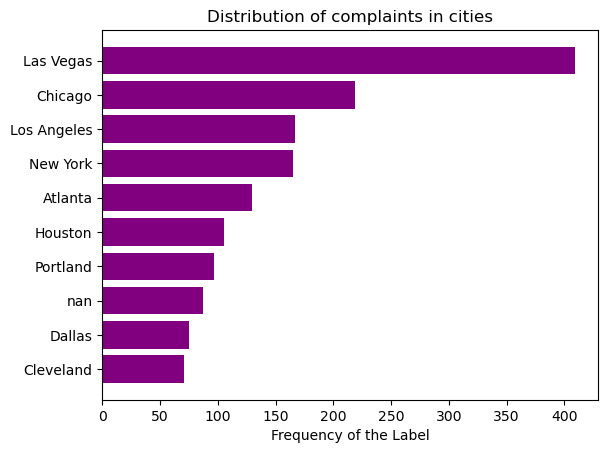

In [6]:
what_in_pic = sorted_ct
ct = [(item[0], item[1]) for item in what_in_pic ]
freq_plotter(ct, "Distribution of complaints in cities")

### columns of our intrest

In [7]:
selected = df.loc[:,["review","policies_violated"]]
selected.head(5)

,review,policies_violated
0,"I'm not a huge mcds lover, but I've been to be...",RudeService\rOrderProblem\rFilthy
1,Terrible customer service. Î¾I came in at 9:30...,RudeService
2,"First they ""lost"" my order, actually they gave...",SlowService\rOrderProblem
3,I see I'm not the only one giving 1 star. Only...,na
4,"Well, it's McDonald's, so you know what the fo...",RudeService


### extracting reviews as a list

In [8]:
raw_review=selected.loc[:,["review"]]
raw_review=raw_review["review"]
raw_review[169]

"The drive- thru might be the worst. Î¾I've gone through a few times. Î¾The staff is rude and when they short your order your made to feel like it's your fault ."

### extracting weird characters 

In [9]:
weird_chars = []
for char in raw_review:
    weird_chars += re.findall(r"[^a-zA-Z0-9\s\w\.]", char.lower())
weird_char_list = list(set(weird_chars))
print(weird_char_list)

['^', '`', '/', '©', '+', '%', ':', '&', '\x97', ']', '\x8a', "'", '#', '[', '?', '\x92', '~', '(', '$', ';', '!', '"', '|', '@', '-', '*', ',', '\\', ')', '±', '=']


In [10]:
"".join(weird_char_list)

'^`/©+%:&\x97]\x8a\'#[?\x92~($;!"|@-*,\\)±='

### removing weird characters

In [11]:
proc_review = [re.sub(r"[Î¾î\'\\\%!\$\&\'()\*\+,\-\.\/:;<=>?@\[\]^_`{|}~]", "", item).lower() for item in raw_review]
proc_review[169] 

'the drive thru might be the worst ive gone through a few times the staff is rude and when they short your order your made to feel like its your fault '

### replacing the review column by the new processed one

In [12]:
selected[["review"]] = pd.DataFrame(proc_review)
selected[:10]

,review,policies_violated
0,im not a huge mcds lover but ive been to bette...,RudeService\rOrderProblem\rFilthy
1,terrible customer service i came in at 930pm a...,RudeService
2,"first they ""lost"" my order actually they gave ...",SlowService\rOrderProblem
3,i see im not the only one giving 1 star only b...,na
4,well its mcdonalds so you know what the food i...,RudeService
5,this has to be one of the worst and slowest mc...,BadFood\rSlowService
6,im not crazy about this mcdonalds this is prim...,SlowService\rScaryMcDs
7,one star and im beng kind i blame management l...,RudeService
8,never been upset about any fast food drive thr...,SlowService\rRudeService\rMissingFood
9,this mcdonalds has gotten much better usually ...,na


### Handling missing values with na or nan label

In [13]:
na_ind = [] ## list of indexes of reviews with na label
multi_labels = [] ## list of indexes of reviews with multi labels
nan_ind = [] # list of indexes of reviews with nan label

for i in range(len(selected)):
    if selected.loc[i, "policies_violated"] == "na":
        na_ind.append(i)
    else:
        try:
            if len(selected.loc[i, "policies_violated"].split("\r"))>1:
                multi_labels.append(i)
        except:
            nan_ind.append(i)
bad_ind = list(set(na_ind + nan_ind))
print("There are ", len(bad_ind), "bad indices \n")
print(bad_ind)

There are  349 bad indices 

[3, 9, 32, 36, 37, 38, 45, 49, 52, 53, 57, 60, 61, 63, 64, 66, 67, 71, 76, 77, 83, 84, 91, 95, 101, 102, 110, 117, 128, 151, 157, 161, 180, 184, 188, 207, 211, 218, 219, 228, 236, 245, 251, 253, 262, 265, 266, 267, 271, 278, 291, 295, 298, 306, 308, 309, 312, 318, 319, 320, 322, 325, 326, 327, 329, 332, 333, 339, 340, 345, 346, 356, 358, 361, 362, 363, 365, 366, 370, 377, 379, 383, 385, 386, 388, 397, 398, 400, 403, 405, 408, 409, 410, 415, 416, 418, 426, 427, 436, 447, 452, 456, 461, 462, 468, 469, 470, 474, 476, 480, 482, 485, 493, 494, 497, 499, 503, 504, 509, 511, 514, 518, 522, 544, 559, 561, 563, 565, 572, 575, 579, 581, 585, 589, 591, 595, 602, 608, 618, 623, 625, 626, 629, 634, 640, 641, 643, 659, 664, 668, 669, 671, 676, 677, 680, 684, 691, 692, 694, 698, 701, 713, 714, 722, 724, 734, 748, 749, 751, 755, 762, 763, 764, 772, 774, 778, 779, 783, 784, 787, 789, 797, 800, 801, 804, 806, 807, 810, 812, 814, 815, 817, 822, 824, 826, 835, 840, 850, 858, 8

#### Let's see how they look like 

In [14]:
for ind in bad_ind[:7] :
    print(selected.loc[ind,"review"] + "\n")

i see im not the only one giving 1 star only because there is not a 25 star thats all i need to say

this mcdonalds has gotten much better usually my order would be wrong every single time so i would not leave that window until i checked every single item i only hit up fast food once a month or so and it needs to be worth it also the fries used to be cold and the cheese on the burger was never melted everything was just lukewarm now my order has been right a few times in a row and my food hot also i love dining room usually you wouldnt find me actually inside a fast food joint but this place has nice flooring stacked stone lots of large windows and a flat screen tv usually on hln sometimes its nice to sneak away for a quick weekend breakfast you know a little budget and time friendly mommy and me date

this has got to be one of the busiest mcdonalds in the metro area  if not the southeast  and they are fairly efficient despite being so busy all the timeyou can come by just about any ti

#### As we can see the reviews are quite ambiguous for us as humans (don't  have any sens) and don't relate to the labels

### Ignoring the reviews with missing label

In [15]:
rest_ind= [i for i in range(len(selected)) if i not in bad_ind] # The rest of indices
my_final_data = selected.loc[rest_ind,:]
my_final_data # Fial clean data

,review,policies_violated
0,im not a huge mcds lover but ive been to bette...,RudeService\rOrderProblem\rFilthy
1,terrible customer service i came in at 930pm a...,RudeService
2,"first they ""lost"" my order actually they gave ...",SlowService\rOrderProblem
4,well its mcdonalds so you know what the food i...,RudeService
5,this has to be one of the worst and slowest mc...,BadFood\rSlowService
...,...,...
1520,i enjoyed the part where i repeatedly asked if...,OrderProblem
1521,worst mcdonalds ive been in in a long time dir...,SlowService\rFilthy\rBadFood
1522,when i am really craving for mcdonalds this se...,ScaryMcDs
1523,two points right out of the gate 1 thuggery kn...,ScaryMcDs


In [16]:
col_labels = my_final_data['policies_violated'] #getting the labels column
col_labels

0       RudeService\rOrderProblem\rFilthy
1                             RudeService
2               SlowService\rOrderProblem
4                             RudeService
5                    BadFood\rSlowService
                      ...                
1520                         OrderProblem
1521         SlowService\rFilthy\rBadFood
1522                            ScaryMcDs
1523                            ScaryMcDs
1524               ScaryMcDs\rSlowService
Name: policies_violated, Length: 1176, dtype: object

In [17]:
labels = list(set(col_labels))
len(labels) #number of unique labels combination

145

In [18]:
labels[:10]

['RudeService\rSlowService\rBadFood',
 'SlowService\rBadFood\rRudeService',
 'SlowService\rScaryMcDs\rRudeService',
 'Filthy\rOrderProblem',
 'RudeService\rBadFood\rFilthy',
 'SlowService',
 'BadFood\rSlowService',
 'OrderProblem\rBadFood',
 'SlowService\rOrderProblem\rFilthy',
 'RudeService\rFilthy']

### Distribution of these labels

In [19]:
dict_of_distrb = nltk.FreqDist(col_labels)
sorted_raw_label_req = dict_of_distrb.most_common()
sorted_raw_label_req

[('RudeService', 177),
 ('SlowService', 127),
 ('OrderProblem', 116),
 ('BadFood', 101),
 ('ScaryMcDs', 71),
 ('SlowService\rRudeService', 56),
 ('RudeService\rOrderProblem', 53),
 ('Filthy', 43),
 ('OrderProblem\rRudeService', 29),
 ('RudeService\rBadFood', 27),
 ('SlowService\rOrderProblem', 26),
 ('RudeService\rSlowService', 19),
 ('MissingFood', 18),
 ('Cost', 16),
 ('OrderProblem\rSlowService', 14),
 ('BadFood\rRudeService', 13),
 ('SlowService\rBadFood', 12),
 ('OrderProblem\rBadFood', 11),
 ('RudeService\rFilthy', 10),
 ('BadFood\rOrderProblem', 9),
 ('BadFood\rSlowService', 8),
 ('Filthy\rBadFood', 7),
 ('Filthy\rRudeService', 7),
 ('SlowService\rRudeService\rOrderProblem', 7),
 ('ScaryMcDs\rRudeService', 7),
 ('RudeService\rScaryMcDs', 6),
 ('SlowService\rFilthy', 6),
 ('SlowService\rOrderProblem\rRudeService', 5),
 ('SlowService\rScaryMcDs', 4),
 ('BadFood\rCost', 4),
 ('ScaryMcDs\rBadFood', 4),
 ('RudeService\rSlowService\rOrderProblem', 4),
 ('RudeService\rMissingFood', 4),

### Plotting top 20 raw labels frequencies

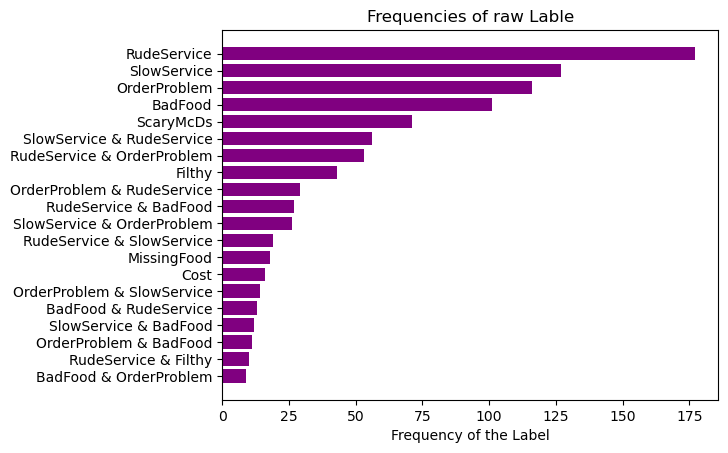

In [20]:
what_in_pic = sorted_raw_label_req[:20]
people = [(item[0].replace("\r", " & "), item[1]) for item in what_in_pic ]
freq_plotter(people, "Frequencies of raw Lable")

#### According to the distribution we notice that several multi-labels have a very low frequency of 1,2,3 or 4....etc
#### Hence Merging becomes a must !

In [21]:
classes = set(sum( list(map(lambda x: x.split("\r"), labels)) , [] ))
classes # The 8 labels plus one for na/nan

{'BadFood',
 'Cost',
 'Filthy',
 'MissingFood',
 'OrderProblem',
 'RudeService',
 'ScaryMcDs',
 'SlowService',
 'na'}

In [22]:
classes = ['BadFood',  'Cost',  'Filthy', 'MissingFood', 'OrderProblem', 'RudeService', 'ScaryMcDs', 'SlowService']
term_freq = dict.fromkeys(classes, 0) #creating dictionnary with every label and its frequency
for item in np.array(col_labels):
    try: 
        for lab in item.split("\r"):
            term_freq[lab]+=1
    except:
        continue
term_freq

{'BadFood': 255,
 'Cost': 49,
 'Filthy': 127,
 'MissingFood': 52,
 'OrderProblem': 333,
 'RudeService': 498,
 'ScaryMcDs': 126,
 'SlowService': 359}

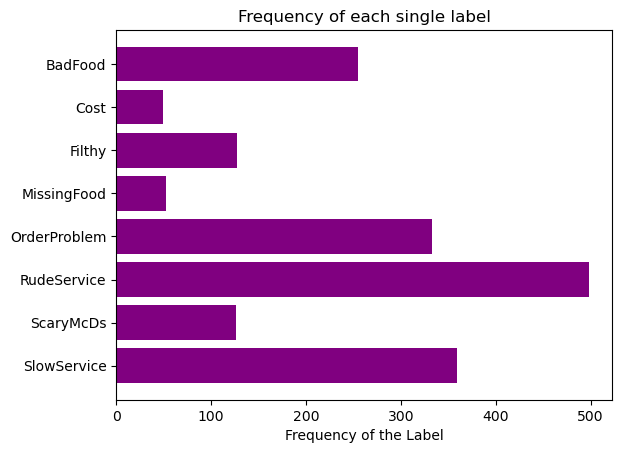

In [23]:
freq_plotter(term_freq.items(), "Frequency of each single label")

#### We notice that our data is not quite balanced
#### - To get a data less imbalanced we will implement these two strategies : 
1- For multi-label we will take only the first label among them (as it has the highest confidence level)

2- We will merge small classes with larger ones which have the same idea, as follows :
- Cost + MissingFood =====> OrderProblem
- ScaryMcDs =====> Filthy


In [24]:
def label_shortener_to_first(long_label):
    splited_labels = long_label.split("\r")
    if splited_labels[0] == "na": 
        return splited_labels[1]
    else:
        return splited_labels[0]
nltk.FreqDist(list(map(label_shortener_to_first, col_labels)))

FreqDist({'RudeService': 328, 'SlowService': 284, 'OrderProblem': 192, 'BadFood': 150, 'ScaryMcDs': 99, 'Filthy': 72, 'Cost': 28, 'MissingFood': 23})

In [25]:
def label_shortener_uniform(long_label):
    splited_labels = long_label.split("\r")
    if "Filthy" in splited_labels:
        res = "Filthy"
    else:
        if splited_labels[0] == "na": 
            res = splited_labels[1]
        else:
            res = splited_labels[0]
    if res == "Cost":
        res = "OrderProblem"
    if res == "MissingFood":
        res = "OrderProblem"
    if res == "ScaryMcDs":
        res = "Filthy" # BadFood
    return res 
    
unif_labels = list(map(label_shortener_uniform, col_labels))
nltk.FreqDist(unif_labels)

FreqDist({'RudeService': 308, 'SlowService': 263, 'OrderProblem': 234, 'Filthy': 226, 'BadFood': 145})

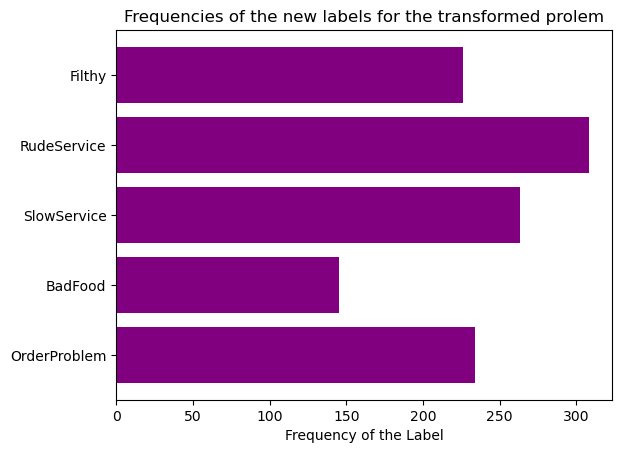

In [26]:
freq_plotter(nltk.FreqDist(unif_labels).items(), "Frequencies of the new labels for the transformed prolem")

#### We managed to get a more balanced data than earlier as we can see in the figure

## Adding the unified label column

In [27]:
my_final_data["policy"] = unif_labels
my_final_data

,review,policies_violated,policy
0,im not a huge mcds lover but ive been to bette...,RudeService\rOrderProblem\rFilthy,Filthy
1,terrible customer service i came in at 930pm a...,RudeService,RudeService
2,"first they ""lost"" my order actually they gave ...",SlowService\rOrderProblem,SlowService
4,well its mcdonalds so you know what the food i...,RudeService,RudeService
5,this has to be one of the worst and slowest mc...,BadFood\rSlowService,BadFood
...,...,...,...
1520,i enjoyed the part where i repeatedly asked if...,OrderProblem,OrderProblem
1521,worst mcdonalds ive been in in a long time dir...,SlowService\rFilthy\rBadFood,Filthy
1522,when i am really craving for mcdonalds this se...,ScaryMcDs,Filthy
1523,two points right out of the gate 1 thuggery kn...,ScaryMcDs,Filthy


### Saving the prcossed and projected data into a file

In [28]:
review_projected_label = my_final_data.loc[:, ["review", "policy"]]

process_txt = []
for item in np.array(review_projected_label):
    process_txt.append(item[0] + "\t" + item[1] +"\n")

with open("processed_file.txt", "w", encoding='utf-8') as fh:
    fh.write("".join(process_txt))
fh.close()
    